In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis

In [4]:
# opening and displaying the csv file which contains data of the properties of flowers with three different species
local_file_path = ".data/blob/main/IRIS.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


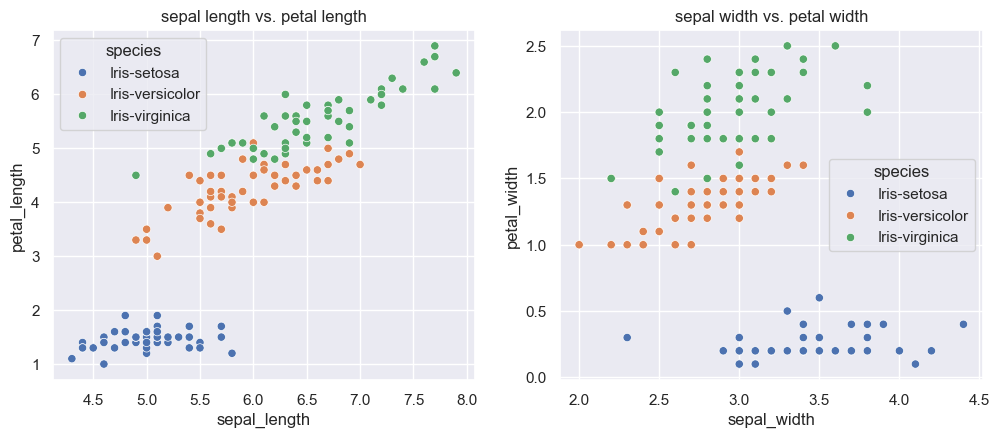

<Figure size 640x480 with 0 Axes>

In [12]:
# plotting the correlation of sepal and petal length of the three different species and the correlation of sepal and petal width of the three different species as two subplots
sns.set(style="darkgrid")
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='sepal_length', y='petal_length', hue = 'species', data=df)
plt.title('sepal length vs. petal length')
plt.subplot(2, 2, 2)
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=df)
plt.title('sepal width vs. petal width')
plt.show()
plt.tight_layout()

The scatterplot of petal length vs sepal length indicates that we have a correlation or relationship (if you will) between the two by the looks of it.
However the scatterplot of petal width vs sepal width indicates that there is no relationship of the two.

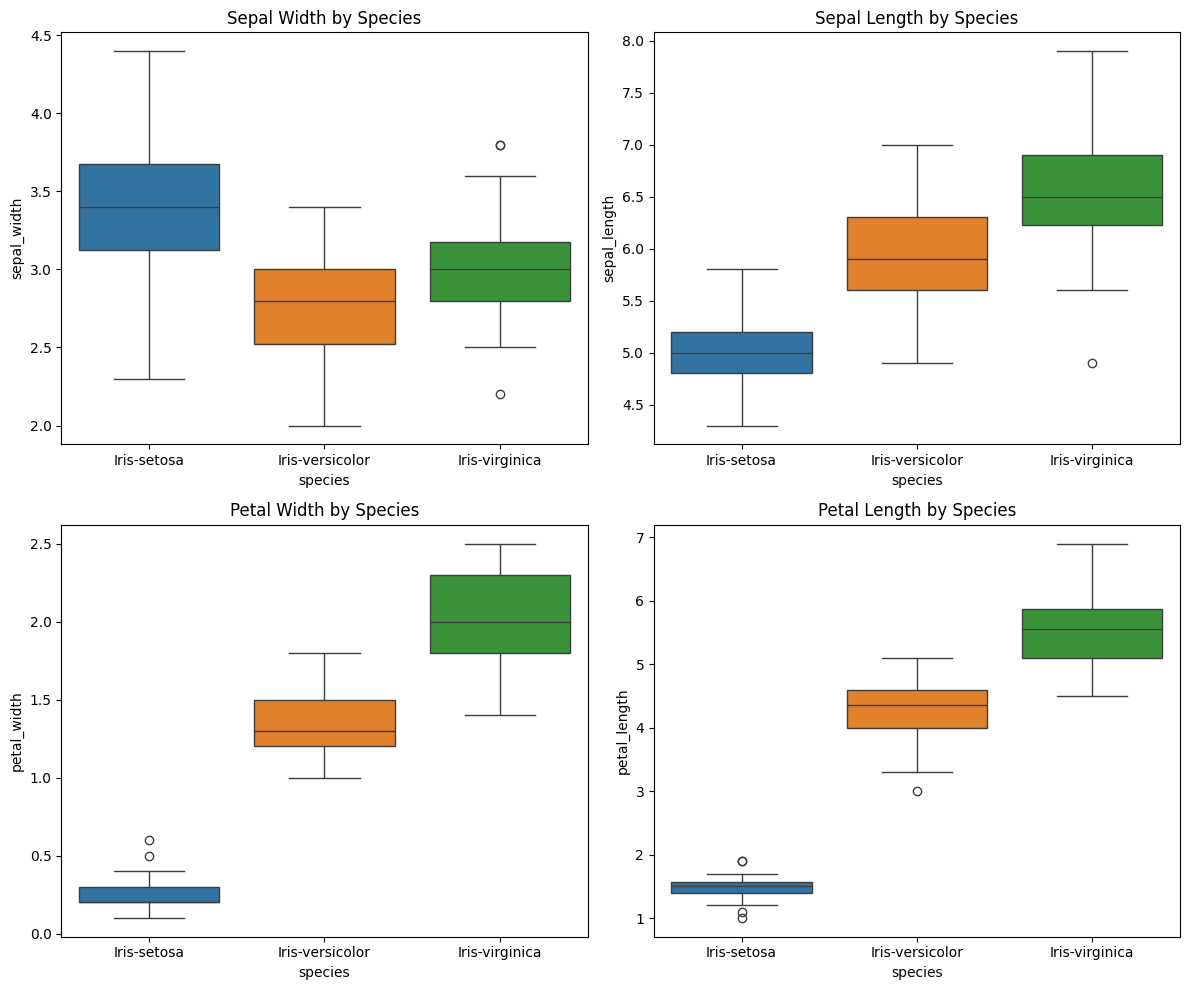

In [26]:
# Create a 2x2 grid of subplots
plt.figure(figsize=(12, 10))

# Box plot for Sepal Width for the 3 species
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_width', hue = 'species', data=df)
plt.title('Sepal Width by Species')

# Box plot for Sepal Length for the 3 species
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_length', hue = 'species', data=df)
plt.title('Sepal Length by Species')

# Box plot for Petal Width for the 3 species
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_width', hue = 'species', data=df)
plt.title('Petal Width by Species')

# Box plot for Petal Length for the 3 species
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_length', hue = 'species', data=df)
plt.title('Petal Length by Species')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()



The boxplots are illustrating the median value and variance spread of sepal width, sepal length, petal width and petal length of the three species of flowers.

The first boxplot (Sepal width vs species) is telling us that Setosa has the largest spread and the widest sepals on average, Virginica has smaller sepals than Setosa considering it has smaller median and variance. Versicolor has the smallest median sepal width with relatively large variability indicating that Versicolor has the smallest sepal.

The second boxplot (Sepal length vs species) is telling us that Virginica has the largest sepal length, Versicolor being second and Setosa has the smallest sepal length.

The third boxplot (Petal width vs species) is telling us that Virginica has the widest and most variable petals, Setosa has small and consistent petals and Versicolor is in between the two.

The forth boxplot (Petal length vs species) is telling us that Virginica has the longest petals and most variable, Versicolor has shorter petals with less variability and Setosa has the shortest and most consistent petals.

Overall the boxplots are giving describtions of the three species of flowers, improving our ability to visualize how they look.

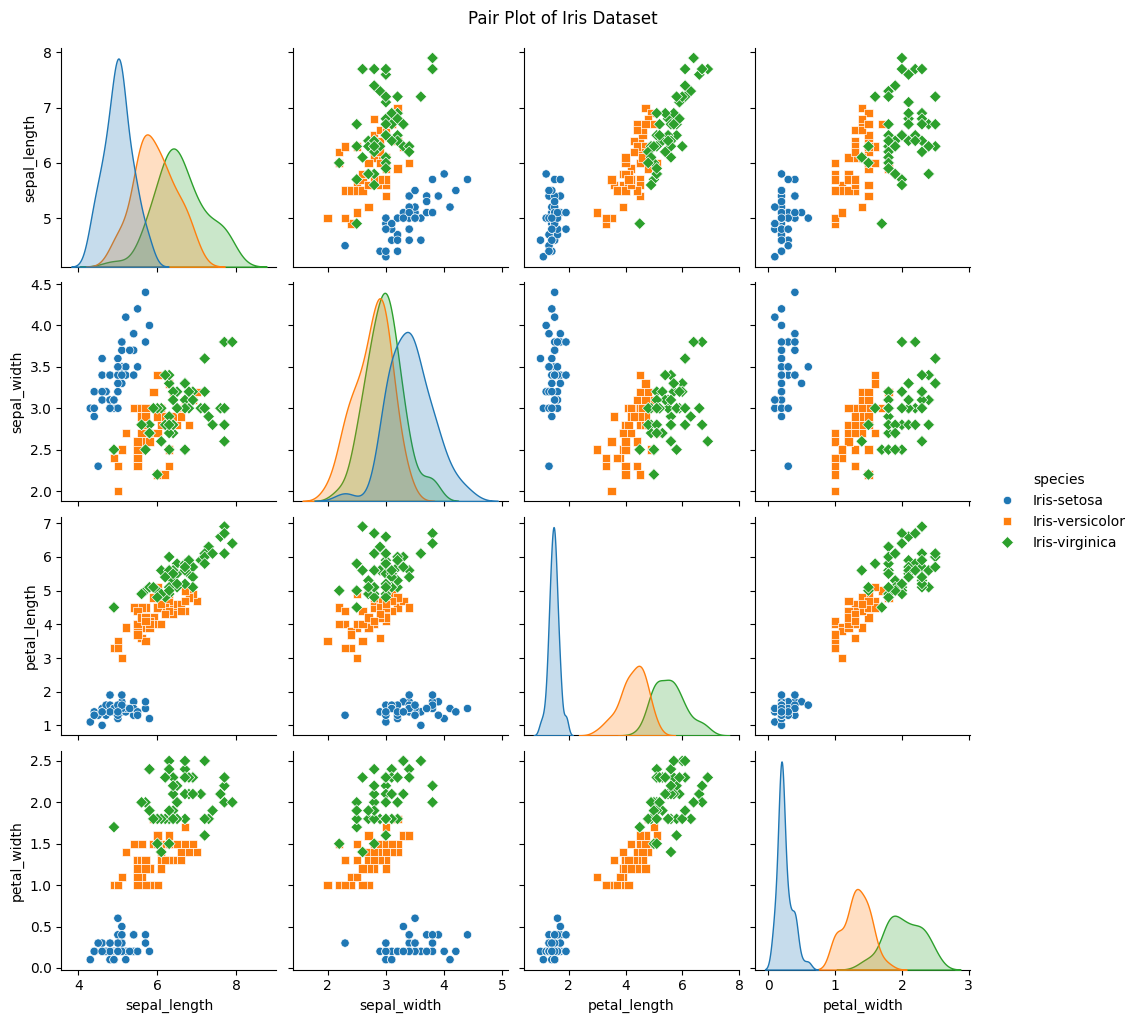

In [30]:
# Pair plot of the dataset
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

We can from the pairs plot draw the conclusion that petal length and petal width show a clear, positive linear relationship. While we can also see how different species cluster based on their measurements. Setosa is the easiest to separate from the others due to its smaller petals and variance.

We can also see how some variables have little, close to zero correlation, such as sepal width vs petal length. 

Birdwatching

In [63]:
# opening and displaying the csv file which contains data of bird sightings
local_file_path = ".data/blob/main/artportalen.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv"
df = pd.read_csv(url)
print(df.head())

         Id  Taxonsorteringsordning Rödlistade   Artnamn   Vetenskapligt namn  \
0  97785066                   55235        NaN  Koltrast        Turdus merula   
1  97785067                   54989        NaN    Blåmes  Cyanistes caeruleus   
2  97785310                   55235        NaN  Koltrast        Turdus merula   
3  97786982                   54735        NaN  Sparvhök      Accipiter nisus   
4  97786985                   54944        NaN     Skata            Pica pica   

             Auktor Antal Ålder/stadium   Kön Aktivitet  ...  Provins  \
0    Linnaeus, 1758     2           NaN   NaN       NaN  ...  Uppland   
1  (Linnaeus, 1758)     2           NaN   NaN       NaN  ...  Uppland   
2    Linnaeus, 1758     1           NaN   NaN       NaN  ...  Uppland   
3  (Linnaeus, 1758)     1           NaN  hona       NaN  ...  Uppland   
4  (Linnaeus, 1758)     2           NaN   NaN       NaN  ...  Uppland   

   Församling  Startdatum  Starttid   Slutdatum Sluttid Kommentar Biotop  

In [23]:
# Convert "Antal" column to numeric, handling non-numeric values
df['Antal'] = pd.to_numeric(df['Antal'], errors='coerce')

# Group by species and sum the observations
species_count = df.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)

# Display the top species
print(species_count.head())


Artnamn
Grönsiska        20211.0
Sothöna           8308.0
Gräsand           7167.0
Storskrake        6750.0
Vitkindad gås     6345.0
Name: Antal, dtype: float64


This displays the most observed species during bird sightings and answers the first question of the questions for birdsighting.

0         1
1         1
2         1
3         1
4        12
         ..
21911     6
21912     6
21913     6
21914     6
21915     6
Name: month, Length: 21916, dtype: int32


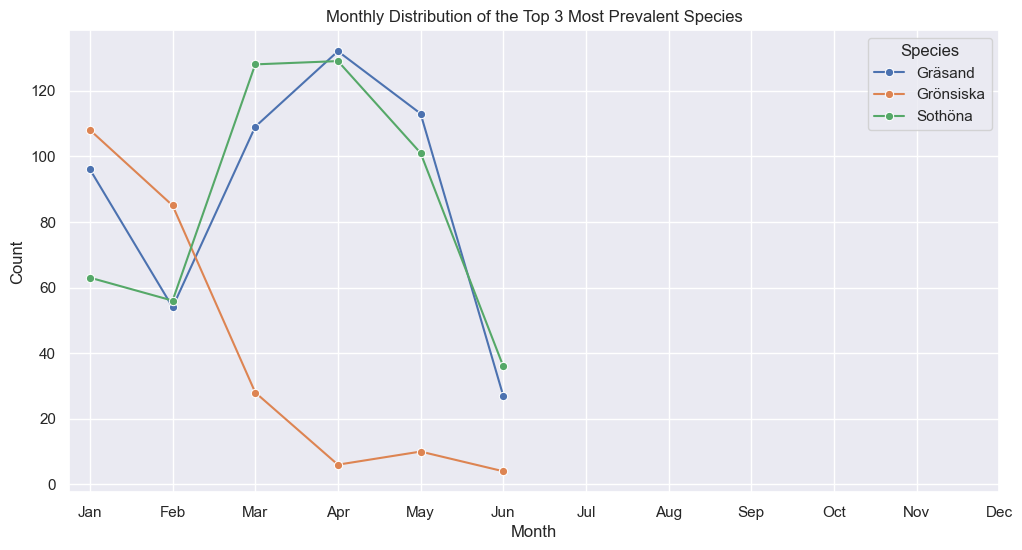

In [34]:
# data for top three prevelant species
# Convert the date column to datetime
df['Startdatum'] = pd.to_datetime(df['Startdatum'])  # Replace 'date' with the  nactual columname
# Extract the month
df['month'] = df['Startdatum'].dt.month
# Count occurrences of each species
species_count = df.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)
# Identify the top 3 most prevalent species
top_species = species_count.head(3).index

# Filter data for the top 3 species
filtered_data = df[df['Artnamn'].isin(top_species)]
# Group by month and species
monthly_distribution = filtered_data.groupby(['month', 'Artnamn']).size().reset_index(name='count')

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_distribution, x='month', y='count', hue='Artnamn', marker='o')

# Add labels and title
plt.title('Monthly Distribution of the Top 3 Most Prevalent Species')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Species')
plt.grid(True)
plt.show()

The monthly distribution of the top three most prevelant species is found by examining the monthly distribution of Grönsiska, Sothöna and Gräsand. This is done by going through the data and counting all sightings of one species that occured in the same month, this data is found in the column Startdatum. By plotting the counts of the most prevelant species sightings in each month we get the distribution shown in a graph, which is displayed in the figure above.

In [36]:
# Displaying the least prevenant species in ascending order
species_count = df.groupby('Artnamn')['Antal'].sum().sort_values(ascending=True)
print(species_count)

Artnamn
Ob. korsnäbb          0.0
Bivråk                1.0
Gravand               1.0
Bändelkorsnäbb        1.0
Fjällvråk             1.0
                   ...   
Vitkindad gås      6345.0
Storskrake         6750.0
Gräsand            7167.0
Sothöna            8308.0
Grönsiska         20211.0
Name: Antal, Length: 173, dtype: float64


The most rare species is the same as the least prevenant ones, and since we already found a way to count all the sightings we can use our "species_count" in an ascending order in order to display the rarest species which is displayed above. 

1: What is the geographical distribution of the observations for the 10 most common species?


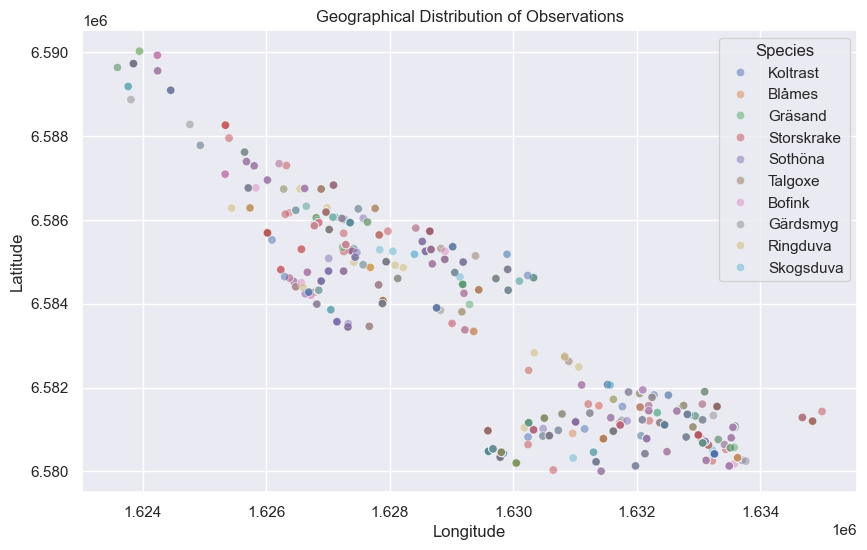

In [40]:
plt.figure(figsize=(10, 6))
top10_species = df['Artnamn'].value_counts().head(10).index
filtered_newdata = df[df['Artnamn'].isin(top10_species)]

sns.scatterplot(data=filtered_newdata, x=df['Ostkoordinat'], y=df['Nordkoordinat'], hue='Artnamn', alpha=0.5)

plt.title('Geographical Distribution of Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Species')
plt.show()

2: Which observers have done most sightings of the 10 most common species?

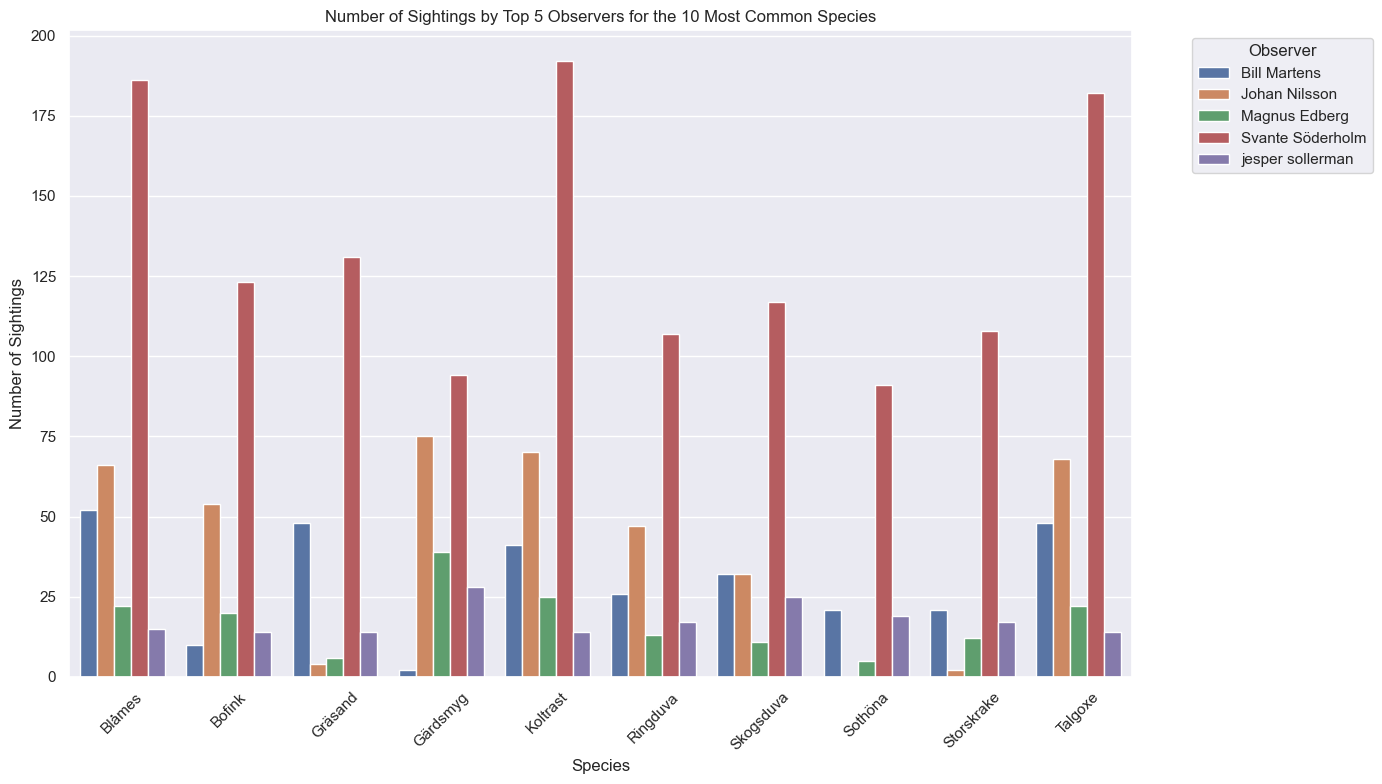

In [59]:
top10_species = df['Artnamn'].value_counts().head(10).index
filtered_newdata = df[df['Artnamn'].isin(top10_species)]

# Group by observer and species, and count the sightings
observer_species_counts = filtered_newdata.groupby(['Observatörer', 'Artnamn']).size().reset_index(name='count')

# Get the total sightings per observer (sum of sightings across all species)
observer_totals = observer_species_counts.groupby('Observatörer')['count'].sum().reset_index()

# Identify the top 5 observers by total sightings
top_observers = observer_totals.sort_values(by='count', ascending=False).head(5)['Observatörer']

# Filter the original dataset to only include the top 5 observers
filtered_observers_data = observer_species_counts[observer_species_counts['Observatörer'].isin(top_observers)]

# Plot the results for the top 5 observers
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_observers_data, x='Artnamn', y='count', hue='Observatörer', dodge=True)

# Add labels and title
plt.title('Number of Sightings by Top 5 Observers for the 10 Most Common Species')
plt.xlabel('Species')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.legend(title='Observer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

3:  Are there any species that are observed together frequently?

In [62]:
# Group observations by same county and time
event_groups = df.groupby(['Län', 'Startdatum'])['Artnamn'].apply(list).reset_index(name='species_list')

# import packages
from collections import Counter
from itertools import combinations

co_occurrence_counts = Counter()
for species_list in event_groups['species_list']:
    for pair in combinations(sorted(species_list), 2):
        co_occurrence_counts[pair] += 1

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['species_pair', 'count']).sort_values(by='count', ascending=False)

# Display top co-occurring pairs
print(co_occurrence_df.head(10))


                species_pair  count
115       (Blåmes, Koltrast)   4015
845      (Koltrast, Talgoxe)   3979
137        (Blåmes, Talgoxe)   3650
246      (Gräsand, Koltrast)   3246
841   (Koltrast, Storskrake)   2914
587     (Gärdsmyg, Koltrast)   2882
98         (Blåmes, Gräsand)   2849
836      (Koltrast, Sothöna)   2836
1373    (Koltrast, Ringduva)   2836
1777   (Koltrast, Skogsduva)   2835


In [ ]:
Predicting Strokes

In [65]:
# opening and displaying the csv file which contains data about strokes and realative variables
local_file_path = ".data/blob/main/stroke-data.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv"
df = pd.read_csv(url)
print(df)
df.describe()


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The dataset seem to contain data of completely different individuals with different variables. The data contains information about gender, age, hypertension, heart disease, if the person has ever been married, type of work and residence, level of glucose, bmi, smoking status and if the person has had a stroke or not. With all this information we could try to find which variables that has most correlation with probability of getting a stroke. An intresting way to analyze the data would be to examine what variables are related to one another and the first question could be to create a pairsplot that demonstrates this. The second question could be if smoking increases the chances of getting a stroke. And the third question, what variable seems to be most correlated with chance of getting a stroke.

1: Creating a pairs plot of the variables and finding relationships between them 

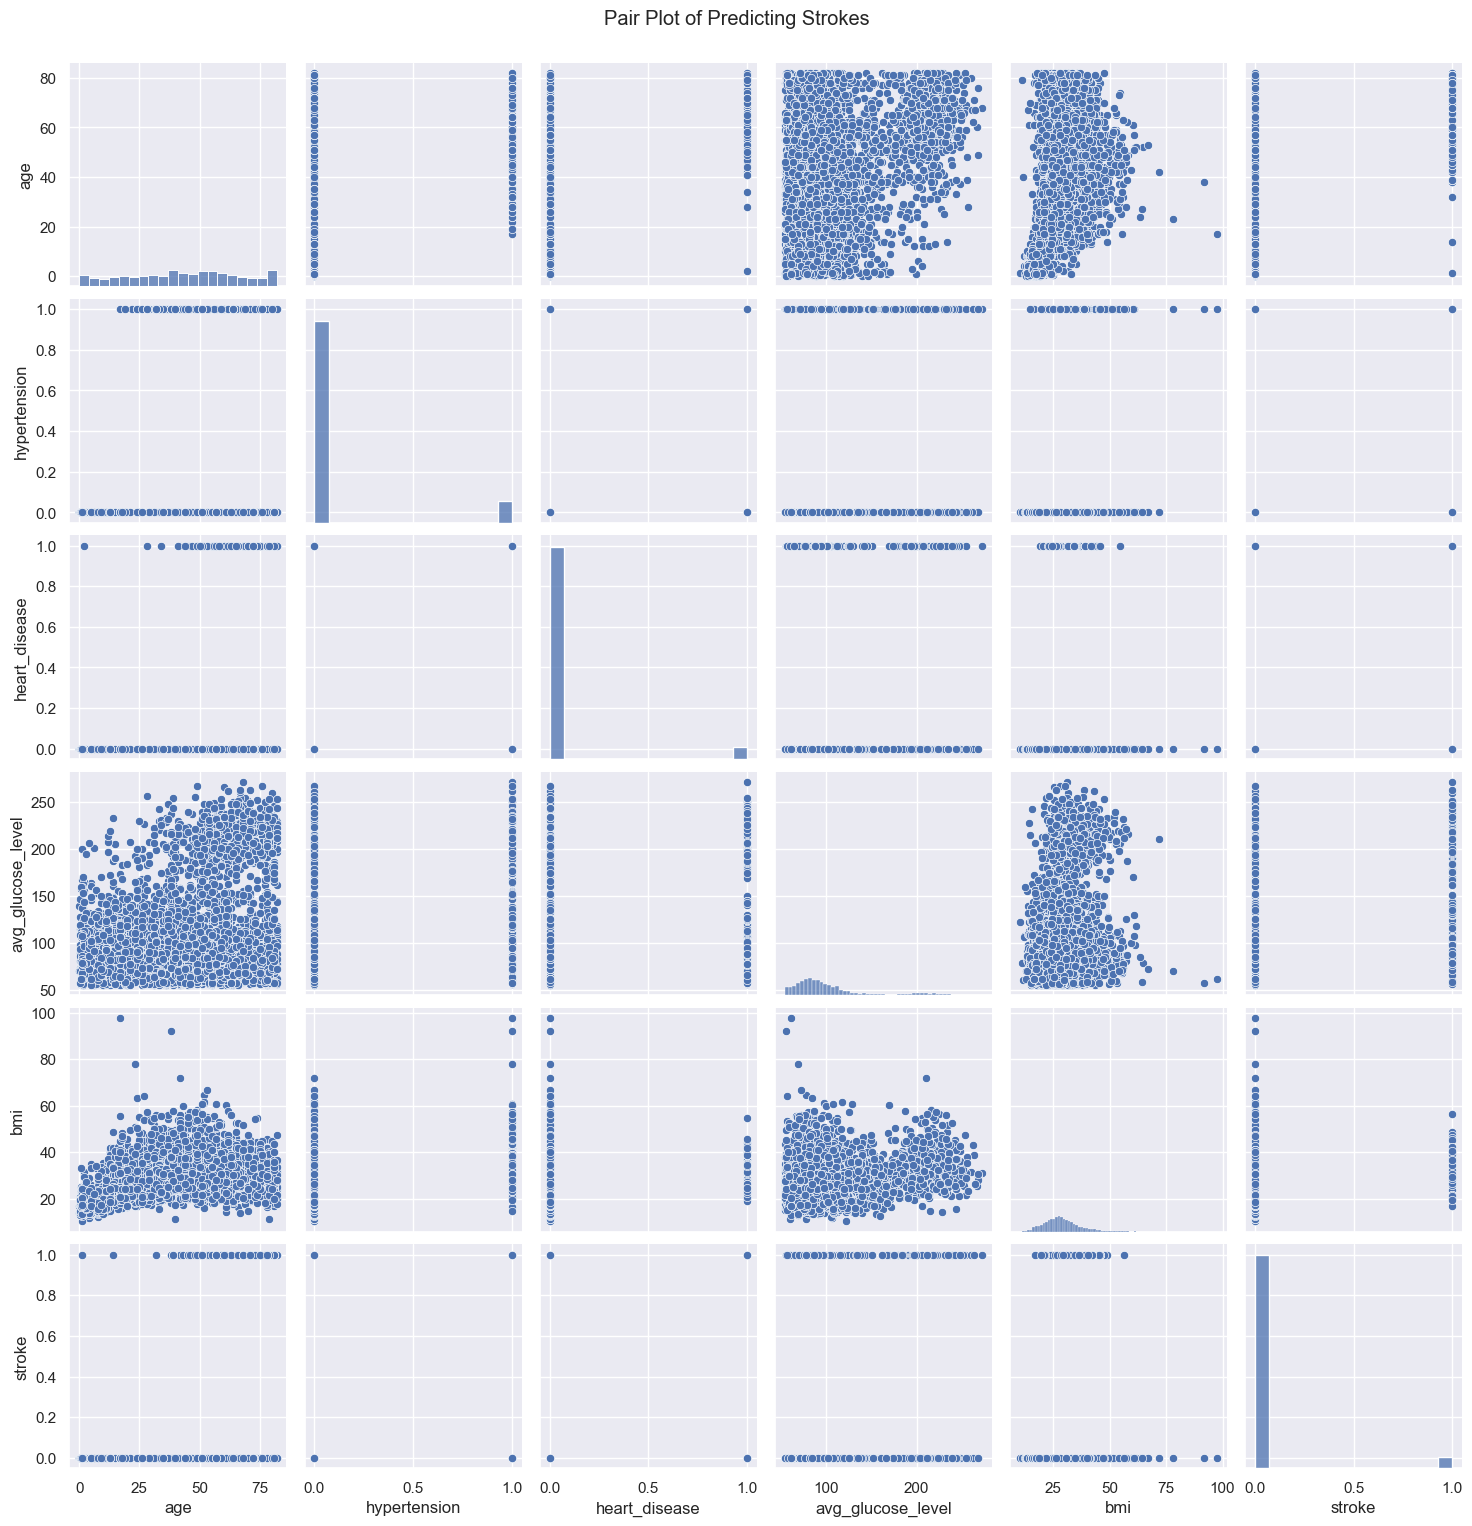

In [69]:
# remove unintresting columns of the data and creatte pair plot of the dataset
relevant_data = df[["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type", "avg_glucose_level", "bmi","smoking_status" , "stroke"]]

sns.pairplot(relevant_data)
plt.suptitle('Pair Plot of Predicting Strokes', y=1.02)
plt.show()

We see that for a lot of variables the pairs plot is not giving us any intresting information, this is partailly due to the difference in binary and continous values for the variables. However we can see that the only variables who seem to have a clear relationship to one another is age and average glucose levels. 

2. How does smoking status affect number of strokes?

<BarContainer object of 3 artists>

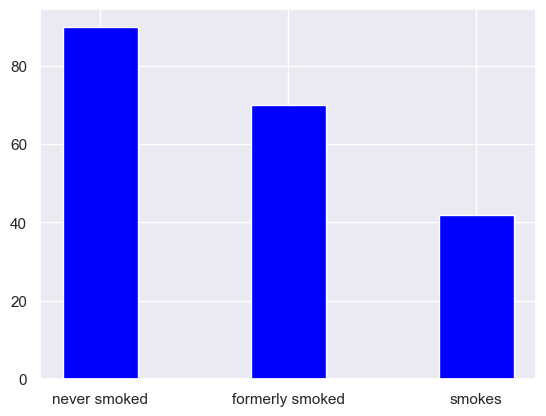

In [70]:
# Sorting the data into groups of male and female data and plotting the number of strokes for each group
formerly_smoked_data = df[df["smoking_status"]=="formerly smoked"]
never_smoked_data = df[df["smoking_status"]=="never smoked"]
smokes_data = df[df["smoking_status"]=="smokes"]
strokes_formerly_smoked = formerly_smoked_data["stroke"].sum()
strokes_never_smoked=never_smoked_data["stroke"].sum()
strokes_smokes=smokes_data["stroke"].sum()
xdata = ["never smoked","formerly smoked","smokes"]
ydata = [strokes_never_smoked, strokes_formerly_smoked, strokes_smokes ]
plt.bar(xdata, ydata, color ='blue', 
        width = 0.4)

We see from this barplot that the individuals from the data who never smokes have the most number of strokes. This could indicate smoking could lower the chance of getting a stroke but that seems far from the reality since studies show that smoking could raise the risk of getting a stroke. The explanation for this outcome is probably that the data mostly consists of people who never smoked or that a lot of individuals from this dataset who never smoked has heart diseases or are old or some other variable that could increase the risk of getting a stroke 

3. And the third question, what variable seems to be most correlated with chance of getting a stroke.

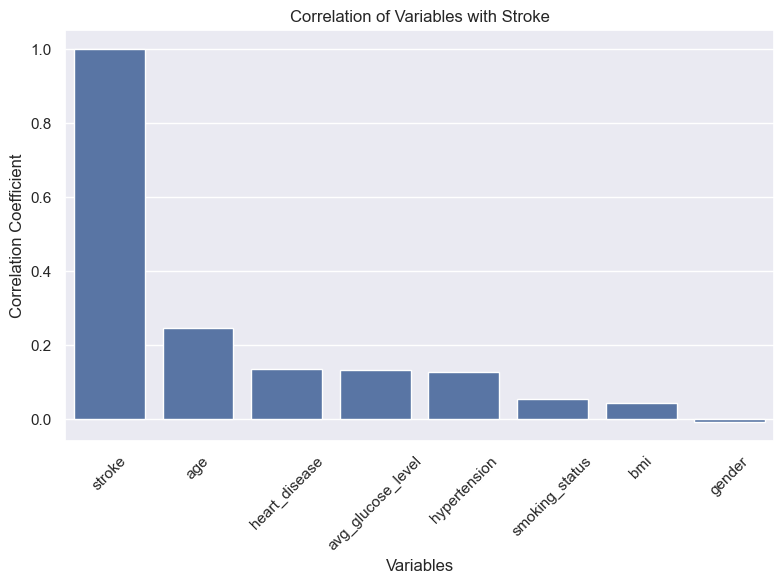

In [86]:
relevant_data = df[["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type", "avg_glucose_level", "bmi","smoking_status" , "stroke"]]
relevant_data.loc[relevant_data['gender'] == 'Male', 'gender'] = 0
relevant_data.loc[relevant_data['gender'] == 'Female', 'gender'] = 1
relevant_data.loc[relevant_data['smoking_status'] == 'never_smoked', 'smoking_status'] = 0
relevant_data.loc[relevant_data['smoking_status'] == 'formerly_smoked', 'smoking_status'] = 1
relevant_data.loc[relevant_data['smoking_status'] == 'smokes', 'smoking_status'] = 2
relevant_data.loc[relevant_data['ever_married'] == 'Yes', 'ever_married'] = 1
relevant_data.loc[relevant_data['ever_married'] == 'No', 'ever_married'] = 0
relevant_data.loc[relevant_data['work_type'] == 'Self-employed', 'work_type'] = 0
relevant_data.loc[relevant_data['work_type'] == 'Private', 'work_type'] = 1
relevant_data.loc[relevant_data['work_type'] == 'Govt_job', 'work_type'] = 2
relevant_data.loc[relevant_data['Residence_type'] == 'Rural', 'Residence_type'] = 0
relevant_data.loc[relevant_data['Residence_type'] == 'Urban', 'Residence_type'] = 1

numeric_columns = relevant_data.select_dtypes(include=['number']).columns
correlation_matrix = relevant_data[numeric_columns].corr()

#Find the correlation between 'stroke' and all other variables
stroke_corr = correlation_matrix['stroke'].sort_values(ascending=False)

# Visualize the top correlations with 'stroke'
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_corr.index, y=stroke_corr.values)
plt.title('Correlation of Variables with Stroke')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that age is the variable that has the largest correlation with the risk of a stroke, followed by heart disease, glucose level and hypertension. We also see that gender has close to nothing to do with the risk of getting a stroke.

Data preparation

In [21]:
# opening and displaying the csv file which contains data about strokes and realative variables
local_file_path = ".data/blob/main/cell_phones_total.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv"
df = pd.read_csv(url)

In [28]:
# Remove columns with missing values
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.infer_objects()
# Creating a function to convert strings with 'k' or 'M' to numeric values ( k = 1000, M = 1 000 000)
def replace_strings(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
    return value

# Looping through the columns and applying the function we created
for col in df_cleaned.columns[1:]:
    df_cleaned.loc[:, col] = df_cleaned[col].apply(replace_strings)
# Ensure all columns are numeric
df_cleaned.iloc[:, 1:] = df_cleaned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Use infer_objects() to avoid FutureWarning
df_cleaned = df_cleaned.infer_objects()

# Fill remaining missing values with zeros
df_filled = df_cleaned.fillna(0)


print(df_filled)

    iso-3  1960  1965  1970  1975  1976  1977  1978  1979  1980  ...  \
0     ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1     AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2     AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3     ALB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4     AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
209   XKX   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
210   YEM   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
211   ZAF   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
212   ZMB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
213   ZWE   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

           2010        2011        2012        2013        2014        2015  \
0      132000.0         0.0    135000.0    139000.0    1

The iso-3 column is telling us what country we are looking at so we want to keep that column as strings. However every other string in the file should be converted to numerical values. We begin by removing the columns with missing data, then create a function that replaces strings with numerical values. After that we use our function for the whole data set by looping through it and replacing missing values with zeros. 

In [40]:
from tabulate import tabulate

#filtering columns from 2015 and later
columns_from_2015 = ['iso-3'] + [col for col in df_filled.columns if col.isdigit() and int(col) >= 2015]
data_from_2015 = df_filled[columns_from_2015]

# sorting the data from year 2015 in descending order
data_sorted_from_2015 = data_from_2015.sort_values(by='2015', ascending=False)

# Formating numerical values so tabulate can be used
data_formatted_from_2015 = data_sorted_from_2015.copy()
for col in columns_from_2015[1:]:
    data_formatted_from_2015[col] = data_formatted_from_2015[col].apply(lambda x: f"{x:.2e}" if x != 0 else "nan")

# Convert data to a list of lists and print using tabulate
first_10_rows = data_formatted_from_2015.head(10)
table_data = first_10_rows.values.tolist()
headers = first_10_rows.columns.tolist()

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+---------+----------+----------+----------+----------+------------+
| iso-3   |     2015 |     2016 |     2017 |     2018 |       2019 |
+=========+==========+==========+==========+==========+============+
| USA     | 3.82e+08 | 3.96e+08 | 4e+08    | 4.22e+08 | nan        |
+---------+----------+----------+----------+----------+------------+
| IDN     | 3.39e+08 | 3.86e+08 | 4.35e+08 | 3.19e+08 |   3.45e+08 |
+---------+----------+----------+----------+----------+------------+
| BRA     | 2.58e+08 | 2.44e+08 | 2.18e+08 | 2.07e+08 | nan        |
+---------+----------+----------+----------+----------+------------+
| RUS     | 2.27e+08 | 2.29e+08 | 2.27e+08 | 2.29e+08 |   2.4e+08  |
+---------+----------+----------+----------+----------+------------+
| JPN     | 1.61e+08 | 1.67e+08 | 1.73e+08 | 1.8e+08  | nan        |
+---------+----------+----------+----------+----------+------------+
| NGA     | 1.51e+08 | 1.54e+08 | 1.45e+08 | 1.73e+08 | nan        |
+---------+----------+----------+-